In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Dataset 1.csv")
df.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [3]:
df.isnull().sum()

Policy no.        0
age               0
sex               1
bmi               1
charges in INR    0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

# Understanding Subplot

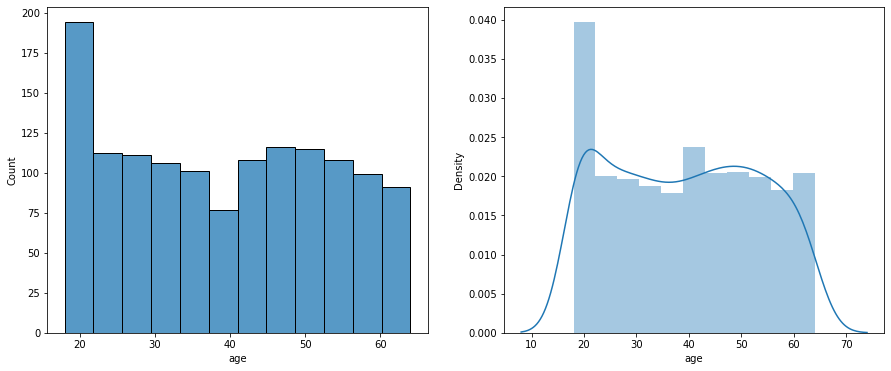

In [6]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)    # (no. of rows, no. of columns, index)
sns.histplot(df["age"])
ax=fig.add_subplot(1,2,2)
sns.distplot(df["age"])
plt.show()

# Activity
- dist plot of age
- dist plot for bmi
- dist plot for charges in INR
- countplot, bargraph for sex columns 

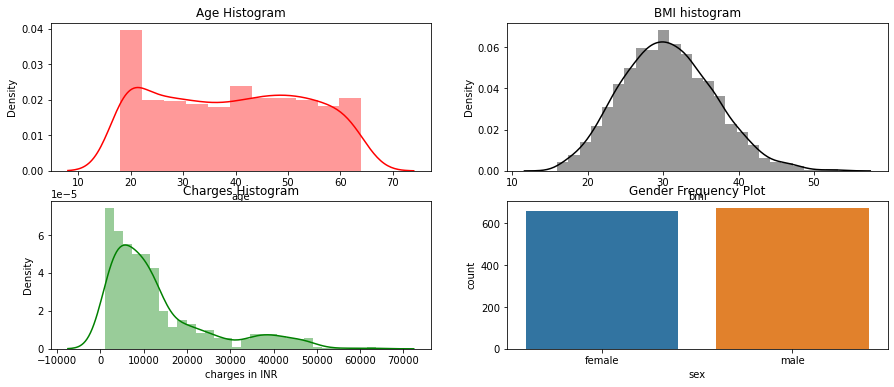

In [7]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(2,2,1)    # (no. of rows, no. of columns, index)
sns.distplot(df["age"],color="r").set_title("Age Histogram")
ax=fig.add_subplot(2,2,2)
sns.distplot(df["bmi"],color="black").set_title("BMI histogram")
ax=fig.add_subplot(2,2,3)
sns.distplot(df["charges in INR"],color="g").set_title("Charges Histogram")
ax=fig.add_subplot(2,2,4)
sns.countplot(df["sex"]).set_title("Gender Frequency Plot")
plt.show()

# Outlier Detection
- Method 1 -- boxplot/whiskerplot
- Method 2 -- scatterplot
- Method 3 -- Z-score/empirical ruling (Data points beyond +/- 3 std dev are considered as outliers)
- Method 4 -- IQR (inter-quartile range)
- Method 3 and 4 are statistical meausures

<AxesSubplot:xlabel='age'>

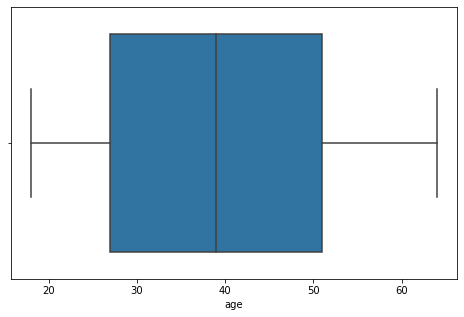

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(df["age"])

<AxesSubplot:xlabel='bmi'>

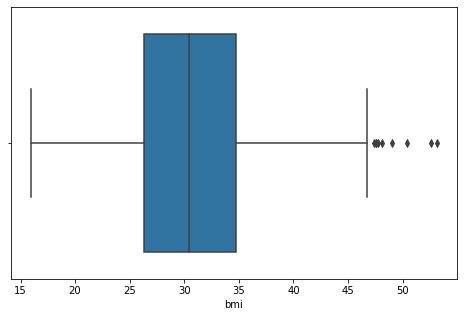

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(df["bmi"])

<AxesSubplot:xlabel='charges in INR'>

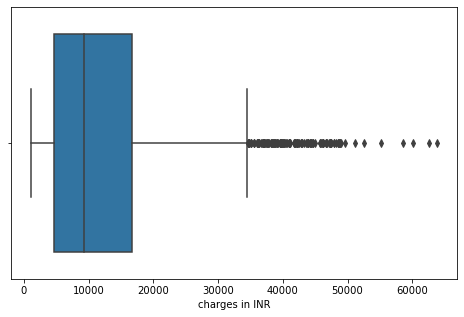

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(df["charges in INR"])

# Whiskers Calculation
- Upper -- Q3 + 1.5 (IQR)
- Lower -- Q1 - 1.5 (IQR)
- IQR -- (Q3 - Q1)

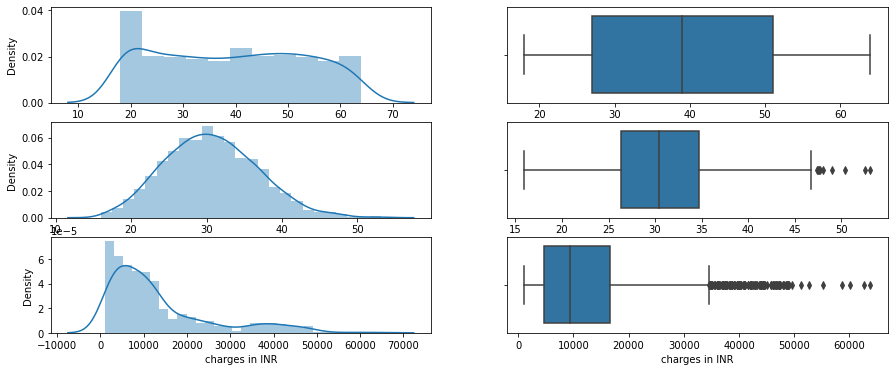

In [11]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(3,2,1)    
sns.distplot(df["age"])
ax=fig.add_subplot(3,2,2)
sns.boxplot(df["age"])
ax=fig.add_subplot(3,2,3)    
sns.distplot(df["bmi"])
ax=fig.add_subplot(3,2,4)
sns.boxplot(df["bmi"])
ax=fig.add_subplot(3,2,5)    
sns.distplot(df["charges in INR"])
ax=fig.add_subplot(3,2,6)
sns.boxplot(df["charges in INR"])
plt.show()

## Detecting Outliers records in the dataset

,Policy no.,age,sex,bmi,charges in INR
14,PLC157024,27,male,42.130,39611.75770
19,PLC157069,30,male,35.300,36837.46700
23,PLC157105,34,female,31.920,37701.87680
29,PLC157159,31,male,36.300,38711.00000
30,PLC157168,22,male,35.600,35585.57600
...,...,...,...,...,...
1300,PLC168598,45,male,30.360,62592.87309
1301,PLC168607,62,male,30.875,46718.16325
1303,PLC168625,43,male,27.800,37829.72420
1313,PLC168715,19,female,34.700,36397.57600


<AxesSubplot:xlabel='charges in INR'>

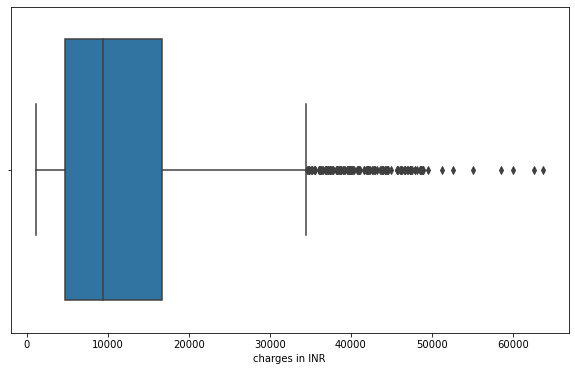

In [12]:
col = "charges in INR"
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
display(df.loc[(df[col] < (q1 - 1.5*iqr)) | (df[col] > (q3 + 1.5*iqr))])
plt.figure(figsize=(10,6))
sns.boxplot(df[col])

In [13]:
df.describe()

,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [14]:
df["bmi"].skew()   # fairly positive skewness range (0.28)

0.2840471105987448

# Outliers treatment

In [15]:
def replace_outlier(my_df,col):
    mean = my_df[col].mean()
    q1 = my_df[col].quantile(0.25)
    q3 = my_df[col].quantile(0.75)
    iqr = q3 - q1
    sd=my_df[col].std()
    
    LL = q1 - 1.5*iqr
    UL = q3 + 1.5*iqr
    
    # method1 for outlier treatment using iqr
    #my_df.loc[my_df[col] < LL, col] = q2   
    #my_df.loc[my_df[col] > UL, col] = q2
    
    # method2 for replacing outlier -  mostly used
    my_df.loc[my_df[col] < LL, col] = q1   
    my_df.loc[my_df[col] > UL, col] = q3
    
    #homework - method3 - create one more method to replace outliers with mean and recalculate lower and upper limit using empirical method formula
    # mean + 3 std dev = upper limit
    # mean - 3 std dev = lower limit
    return my_df

# Plot

In [16]:
def odt_plots(my_df,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    # another method for creating canvas
    # descriptive statistic boxplot
    sns.boxplot(my_df[col] , ax = ax1)
    ax1.set_title(col + " boxplot before outlier treatment")
    ax1.set_xlabel("boxplot")
    ax1.set_ylabel("values")
    
    
    # replacing outliers
    my_df_out = replace_outlier(my_df,col)
    
    # plotting boxplot after outlier treatment
    sns.boxplot(my_df[col] , ax = ax2)
    ax2.set_title(col + " boxplot after outlier treatment")
    ax2.set_xlabel("boxplot")
    ax2.set_ylabel("values")
    plt.show()

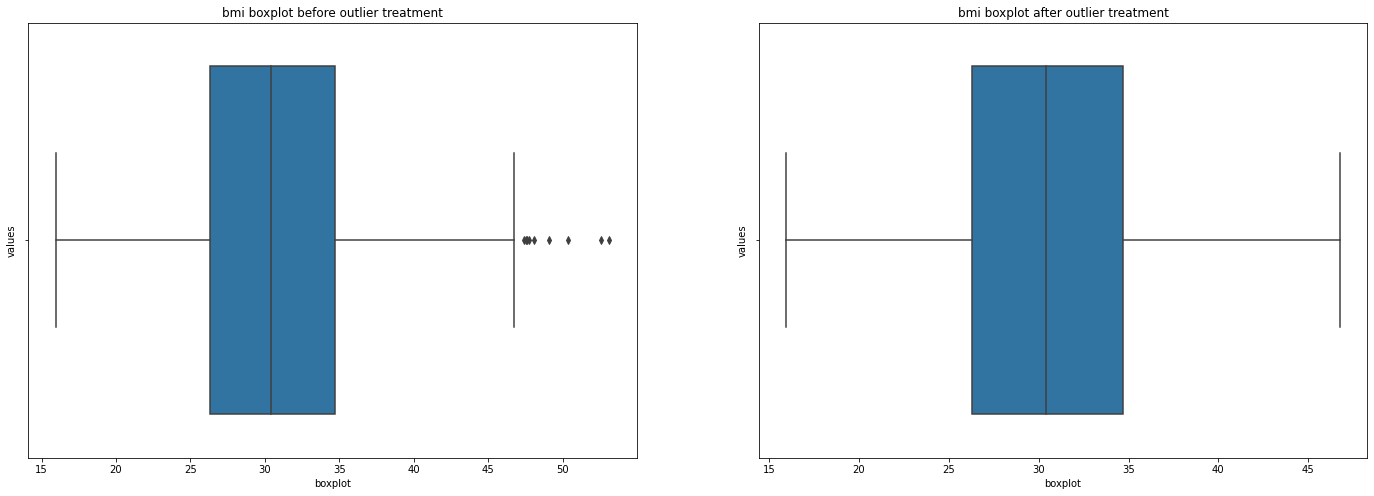

In [17]:
odt_plots(df,"bmi")

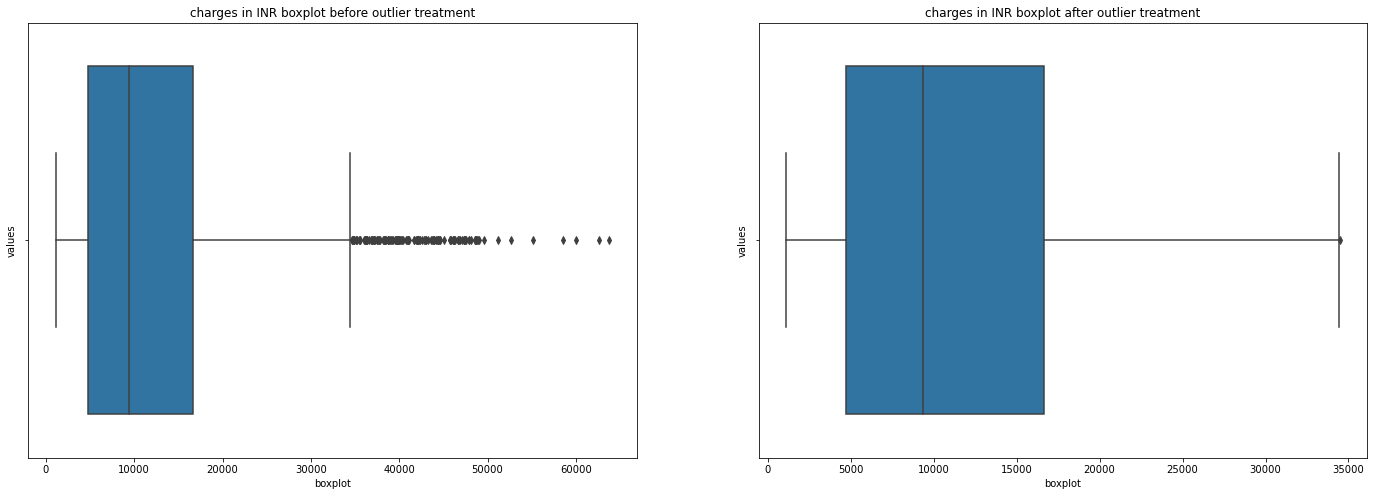

In [18]:
odt_plots(df,"charges in INR")